## Определение перспективного тарифа для телеком компании

Сфера деятельности - федеральный оператор сотовой связи (телеком).
Клиентам предлагают два тарифных плана: «Смарт» и «Ультра». Коммерческий отдел хочет понять, какой тариф приносит больше денег. 

Необходимо сделать предварительный анализ тарифов на небольшой выборке клиентов. Доступны данные 500 пользователей оператора сотовой связи: кто они, откуда, каким тарифом пользуются, сколько звонков и сообщений каждый отправил за 2018 год. Нужно проанализировать поведение клиентов и сделать вывод — какой тариф лучше.

<p> <font size="+1"> <b>
Шаг 1. Изучение общей информации о данных 
</b>  </font> </p>

In [1]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import numpy as np
from scipy import stats as st
import random
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import warnings; warnings.filterwarnings(action='ignore')
from scipy import stats

In [2]:
# Создадим функцию для прочтения датафреймов и вывода общей информации
def info(df):
    print(df.info())
    print(df.describe())
    print(df.head())

In [3]:
df_calls = pd.read_csv('/datasets/calls.csv')
info(df_calls)
# Явных пропусков нет, однако есть в столбце "продолжительность" значения, равные нулю
# Необходимо с ними поработать! (возможно, что будут найдены другие аномальные значения) 
# Call_date имеет тип object, нужно поменять на временной тип, 
# id - тоже необходимо сменить тип данных

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
id           202607 non-null object
call_date    202607 non-null object
duration     202607 non-null float64
user_id      202607 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB
None
            duration        user_id
count  202607.000000  202607.000000
mean        6.755887    1253.940619
std         5.843365     144.722751
min         0.000000    1000.000000
25%         1.300000    1126.000000
50%         6.000000    1260.000000
75%        10.700000    1379.000000
max        38.000000    1499.000000
       id   call_date  duration  user_id
0  1000_0  2018-07-25      0.00     1000
1  1000_1  2018-08-17      0.00     1000
2  1000_2  2018-06-11      2.85     1000
3  1000_3  2018-09-21     13.80     1000
4  1000_4  2018-12-15      5.18     1000


In [4]:
df_internet = pd.read_csv('/datasets/internet.csv')
info(df_internet)
# Явных пропусков нет. 
# для id, mb_used и session_date необходимо сменить тип данных

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
Unnamed: 0      149396 non-null int64
id              149396 non-null object
mb_used         149396 non-null float64
session_date    149396 non-null object
user_id         149396 non-null int64
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB
None
          Unnamed: 0        mb_used        user_id
count  149396.000000  149396.000000  149396.000000
mean    74697.500000     370.192426    1252.099842
std     43127.054745     278.300951     144.050823
min         0.000000       0.000000    1000.000000
25%     37348.750000     138.187500    1130.000000
50%     74697.500000     348.015000    1251.000000
75%    112046.250000     559.552500    1380.000000
max    149395.000000    1724.830000    1499.000000
   Unnamed: 0      id  mb_used session_date  user_id
0           0  1000_0   112.95   2018-11-25     1000
1           1  1000_1  1052.81   2018-09-07     1000
2          

In [5]:
df_messages = pd.read_csv('/datasets/messages.csv')
info(df_messages)
# Явных пропусков нет. Та же история с id и message_date. 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
id              123036 non-null object
message_date    123036 non-null object
user_id         123036 non-null int64
dtypes: int64(1), object(2)
memory usage: 2.8+ MB
None
             user_id
count  123036.000000
mean     1256.989410
std       143.523967
min      1000.000000
25%      1134.000000
50%      1271.000000
75%      1381.000000
max      1499.000000
       id message_date  user_id
0  1000_0   2018-06-27     1000
1  1000_1   2018-10-08     1000
2  1000_2   2018-08-04     1000
3  1000_3   2018-06-16     1000
4  1000_4   2018-12-05     1000


In [6]:
df_tariffs = pd.read_csv('/datasets/tariffs.csv')
info(df_tariffs)
# Cудя по всему - данные в порядке: название - object, остальные значения - int64 (в данном случае - это верное решение)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
messages_included        2 non-null int64
mb_per_month_included    2 non-null int64
minutes_included         2 non-null int64
rub_monthly_fee          2 non-null int64
rub_per_gb               2 non-null int64
rub_per_message          2 non-null int64
rub_per_minute           2 non-null int64
tariff_name              2 non-null object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes
None
       messages_included  mb_per_month_included  minutes_included  \
count           2.000000               2.000000          2.000000   
mean          525.000000           23040.000000       1750.000000   
std           671.751442           10861.160159       1767.766953   
min            50.000000           15360.000000        500.000000   
25%           287.500000           19200.000000       1125.000000   
50%           525.000000           23040.000000       1750.000000   
75%           762.50

In [7]:
df_users = pd.read_csv('/datasets/users.csv')
info(df_users)
# в столбце churn_date много пропусков, необходимо решить, что с ними делать
# Необходимо поменять тип данных для дат и посмотреть, нужны ли целочисленные значения для user_id и age.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
user_id       500 non-null int64
age           500 non-null int64
churn_date    38 non-null object
city          500 non-null object
first_name    500 non-null object
last_name     500 non-null object
reg_date      500 non-null object
tariff        500 non-null object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB
None
           user_id        age
count   500.000000  500.00000
mean   1249.500000   46.58800
std     144.481833   16.66763
min    1000.000000   18.00000
25%    1124.750000   32.00000
50%    1249.500000   46.00000
75%    1374.250000   62.00000
max    1499.000000   75.00000
   user_id  age churn_date         city first_name  last_name    reg_date  \
0     1000   52        NaN    Краснодар     Рафаил  Верещагин  2018-05-25   
1     1001   41        NaN       Москва       Иван       Ежов  2018-11-01   
2     1002   59        NaN  Стерлитамак    Евгений  Абрамович  2018-06

In [8]:
df = df_internet.query('mb_used < 1')
df['mb_used'].value_counts()

0.00    19598
0.41        6
0.52        4
0.86        3
0.17        3
        ...  
0.27        1
0.04        1
0.23        1
0.84        1
0.47        1
Name: mb_used, Length: 63, dtype: int64

<p> <font size="+1"> <b>
    Вывод
    </b> </font> </p>

На первый взгляд - данные не такие проблемные, как в предыдущих проектах. Однако не стоит расслабляться! Необходимо тщательно изучить данные. 
Для дальнейшего анализа нужно будет соединять несколько датафреймов в один.

<p> <font size="+1"> <b>
Шаг 2. Подготовка данных
    </font>  </b>

In [9]:
df_calls.head()

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000


<p> <li>Приведите данные к нужным типам</li> </p>  

In [10]:
# Для начала поработаем по отдельности с каждым датасэтом
# 1. df_calls
# Поменяем для call_date тип данных на datetime
df_calls['call_date'] = pd.to_datetime(df_calls['call_date'], format='%Y-%m-%d')
# Проверим, можно ли округлять и менять тип данных для duration 
# может быть при округлении потеряем часть значений, которые близки к 0
df_calls_type = df_calls.query('duration < 1')
df_calls_type['duration'].value_counts()
# Исходя из результатов - округлять и менять тип данных для этого столбца не имеет смысла (потеряем много данных)

0.00    39613
0.23      115
0.96      105
0.68      103
0.83      102
        ...  
0.11       67
0.21       67
0.53       64
0.52       63
0.14       63
Name: duration, Length: 100, dtype: int64

In [11]:
# Проверим изменения
df_calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
id           202607 non-null object
call_date    202607 non-null datetime64[ns]
duration     202607 non-null float64
user_id      202607 non-null int64
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 6.2+ MB


In [12]:
# 2.df_internet
# Поменяем для session_date тип данных на datetime
df_internet['session_date'] = pd.to_datetime(df_internet['session_date'], format='%Y-%m-%d')
# Поменяем float на int для mb_used (точность до нескольких знаков после запятой тут не нужна)
# Для начала правильно округлим значения
df_internet['mb_used'] = round(df_internet['mb_used'], 0)
df_internet['mb_used'] = df_internet['mb_used'].astype('int')
# Проверим изменения
df_internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
Unnamed: 0      149396 non-null int64
id              149396 non-null object
mb_used         149396 non-null int64
session_date    149396 non-null datetime64[ns]
user_id         149396 non-null int64
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 5.7+ MB


In [13]:
# 3. df_messages
# Поменяем для message_date тип данных на datetime
df_messages['message_date'] = pd.to_datetime(df_messages['message_date'], format='%Y-%m-%d')
# Проверим изменения
df_internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
Unnamed: 0      149396 non-null int64
id              149396 non-null object
mb_used         149396 non-null int64
session_date    149396 non-null datetime64[ns]
user_id         149396 non-null int64
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 5.7+ MB


In [14]:
# 4.df_tariffs
# Менять тип данных не нужно для этого датафрейма

In [15]:
# 5. df_users
# Необходимо поменять тип данных для churn_date и reg_date на datetime
df_users['churn_date'] = pd.to_datetime(df_users['churn_date'], format='%Y-%m-%d')
df_users['reg_date'] = pd.to_datetime(df_users['reg_date'], format='%Y-%m-%d')
# Проверим 
df_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
user_id       500 non-null int64
age           500 non-null int64
churn_date    38 non-null datetime64[ns]
city          500 non-null object
first_name    500 non-null object
last_name     500 non-null object
reg_date      500 non-null datetime64[ns]
tariff        500 non-null object
dtypes: datetime64[ns](2), int64(2), object(4)
memory usage: 31.4+ KB


<p> <li>Найдите и исправьте ошибки в данных</li> </p> 

In [16]:
# Посмотрим по порядку каждый датасет
# 1. df_calls
df_calls['duration'].value_counts()
# Как видно - аномально большой продолжительности разговора нет, 
# однако есть много звонков с продолжительностью разговора 0 мин.

0.00     39613
4.49       142
5.50       142
6.15       141
6.38       141
         ...  
27.02        1
26.19        1
25.34        1
27.13        1
24.28        1
Name: duration, Length: 2871, dtype: int64

In [17]:
# Будем считать, что если звонок занял 0 минут, значит разговор не состоялся 
# (вне зоне доступа/никто не взял трубку)
# Поэтому заменим на отрицательное значение нули
df_calls['duration'] = df_calls['duration'].replace(0.00, -9999)
# Проверим
df_calls['duration'].value_counts()

-9999.00    39613
 4.49         142
 5.50         142
 6.38         141
 6.15         141
            ...  
 27.02          1
 25.34          1
 31.18          1
 27.13          1
 24.28          1
Name: duration, Length: 2871, dtype: int64

In [18]:
# 2.df_internet
# Посмотрим какие значения чаще всего встречаются в столбце mb_used
df_internet['mb_used'].value_counts()
# Около 15% не используют интернет, что вполне логично (кнопочные телефоны, не все пенсионеры умеют пользоваться интернетом)
# Было бы интересно посмотреть по годам как этот процент изменяется (есть подозрение, что с каждый годом будет стремительно падать)

# Cудя по всему - на первый взгляд, ошибок в данных нет.

0       19649
253       222
382       219
333       219
286       219
        ...  
1518        1
1437        1
1309        1
1389        1
1490        1
Name: mb_used, Length: 1425, dtype: int64

In [19]:
# 3. df_messages
# На первый взгляд - данные в порядке

In [20]:
# 4. df_tariffs
# Такая же история, как и с 3.

In [21]:
# 5. df_users
# Проверим неочевидные вопросы для столбца возраста
df_users['age'].value_counts()
# Аномальных значений выявлено не было

53    14
42    14
63    13
71    13
64    13
73    12
21    12
40    12
39    11
47    11
29    11
26    11
37    11
41    10
36    10
58    10
45    10
70    10
52    10
51     9
27     9
48     9
50     9
28     9
30     9
24     9
20     9
19     9
56     9
23     9
68     9
66     9
65     9
69     8
62     8
60     8
44     8
55     8
25     7
43     7
67     7
35     7
74     7
32     7
31     7
46     7
75     6
54     6
59     6
18     6
33     5
34     5
38     5
22     5
72     5
49     4
57     4
61     3
Name: age, dtype: int64

In [22]:
# Проверим city
df_users['city'].value_counts()
# Судя по всему - с данными все в порядке

Москва             99
Санкт-Петербург    39
Новосибирск        16
Омск               14
Казань             14
                   ..
Нижневартовск       1
Иваново             1
Химки               1
Подольск            1
Архангельск         1
Name: city, Length: 76, dtype: int64

In [23]:
# Проверим first_name
df_users['first_name'].value_counts()
# На первый взгляд - с данными все в порядке
# Удивляет наличие в топе такого большого количества редких имен, однако, скорее всего, дело в маленькой выборке

Радим       6
Леонид      5
Пётр        5
Адам        4
Всеволод    4
           ..
Илья        1
Алёна       1
Людмила     1
Леся        1
Исаак       1
Name: first_name, Length: 246, dtype: int64

In [24]:
# Проверим last_name 
df_users['last_name'].value_counts()
# С данными все хорошо

Андреенко    5
Абашкина     3
Аркадьев     3
Анищенко     3
Булгаков     3
            ..
Медведев     1
Болдырева    1
Акимов       1
Костин       1
Сергеева     1
Name: last_name, Length: 419, dtype: int64

In [25]:
# Проверим tariff
df_users['tariff'].value_counts()
# Лишнего здесь нет - всего 2 тарифа

smart    351
ultra    149
Name: tariff, dtype: int64

In [26]:
# Теперь нужно подумать, что делать с пропусками в churn_date
# - это дата прекращения пользования тарифом.
# Логично предположить, что если нет информации, то значит человек не переключался на другой тариф
# Значит, мы можем заменить эти значения на такие даты, когда человек ещё не мог переключать тариф
# Например, на 1900 год.
df_users['churn_date'] = df_users['churn_date'].fillna('1900-01-01 00:00:00')
# Проверим тип данных
df_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
user_id       500 non-null int64
age           500 non-null int64
churn_date    500 non-null object
city          500 non-null object
first_name    500 non-null object
last_name     500 non-null object
reg_date      500 non-null datetime64[ns]
tariff        500 non-null object
dtypes: datetime64[ns](1), int64(2), object(5)
memory usage: 31.4+ KB


In [27]:
# Так как изменился тип данных при замене на заглушки, то поменяем обратно на datetime
df_users['churn_date'] = pd.to_datetime(df_users['churn_date'], format='%Y-%m-%d')
# Проверим тип данных
df_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
user_id       500 non-null int64
age           500 non-null int64
churn_date    500 non-null datetime64[ns]
city          500 non-null object
first_name    500 non-null object
last_name     500 non-null object
reg_date      500 non-null datetime64[ns]
tariff        500 non-null object
dtypes: datetime64[ns](2), int64(2), object(4)
memory usage: 31.4+ KB


In [28]:
# Проверим как заменились значения
df_users['churn_date'].value_counts()

1900-01-01    462
2018-12-21      2
2018-12-09      2
2018-10-14      2
2018-12-03      2
2018-10-03      2
2018-12-18      1
2018-09-02      1
2018-10-28      1
2018-11-26      1
2018-12-26      1
2018-10-25      1
2018-12-23      1
2018-11-22      1
2018-10-05      1
2018-12-20      1
2018-09-27      1
2018-12-24      1
2018-11-30      1
2018-12-14      1
2018-11-13      1
2018-11-27      1
2018-10-27      1
2018-09-26      1
2018-12-11      1
2018-12-25      1
2018-11-07      1
2018-11-21      1
2018-10-04      1
2018-08-17      1
2018-08-31      1
2018-12-16      1
2018-12-30      1
2018-11-16      1
Name: churn_date, dtype: int64

<p> Посчитайте для каждого пользователя: </p>

<p> <li> количество сделанных звонков и израсходованных минут разговора по месяцам </li> </p>  

In [29]:
# Вспоминая, что мы сделали замену нулей на -9999, нельзя сразу приступать к заданию
# Необходимо для начала сделать срез данных
df_calls_for_question = df_calls.query('duration >= 0.00')
# Добавим в срез столбец, отвечающих за месяц, когда был сделан звонок
df_calls_for_question['month_call_date'] = df_calls_for_question['call_date'].dt.month
# Посчитаем количество звонков для каждого пользователя 
table_calls_count = df_calls_for_question.groupby(['user_id', 'month_call_date'])['duration'].count()
table_calls_count

user_id  month_call_date
1000     5                  17
         6                  28
         7                  41
         8                  42
         9                  46
                            ..
1498     10                 30
1499     9                   8
         10                 44
         11                 62
         12                 56
Name: duration, Length: 3168, dtype: int64

In [30]:
# Посчитаем исрасходованные минуты для каждого пользователя 
table_calls_duration = df_calls_for_question.groupby(['user_id', 'month_call_date'])['duration'].sum()
table_calls_duration

user_id  month_call_date
1000     5                  150.06
         6                  158.90
         7                  318.80
         8                  389.87
         9                  440.14
                             ...  
1498     10                 232.63
1499     9                   64.65
         10                 429.91
         11                 576.50
         12                 465.16
Name: duration, Length: 3168, dtype: float64

<p> <li> количество отправленных сообщений по месяцам </li> </p> 

In [31]:
# Добавим столбец, отвечающих за месяц, когда были отправлены сообщения
df_messages['month_message_date'] = df_messages['message_date'].dt.month
# Посчитаем количество сообщений для каждого пользователя 
table_messages_count = df_messages.groupby(['user_id','month_message_date'])['id'].count()
table_messages_count

user_id  month_message_date
1000     5                     22
         6                     60
         7                     75
         8                     81
         9                     57
                               ..
1498     10                    42
1499     9                     11
         10                    48
         11                    59
         12                    66
Name: id, Length: 2717, dtype: int64

<p> <li> объем израсходованного интернет-трафика по месяцам </li></p>

In [32]:
## Добавим столбец, отвечающий за потраченное кол-во мегабайт интернета в месяц
df_internet['month_session_date'] = df_internet['session_date'].dt.month
# Посчитаем объем израсходованного интернет-трафика для каждого пользователя по месяцам 
table_internet_volume = df_internet.groupby(['user_id', 'month_session_date'])['mb_used'].sum()
table_internet_volume

user_id  month_session_date
1000     5                      2253
         6                     23232
         7                     14004
         8                     14054
         9                     14569
                               ...  
1498     10                    20581
1499     9                      1846
         10                    17792
         11                    17963
         12                    13055
Name: mb_used, Length: 3203, dtype: int64

<p> <li> помесячную выручку с каждого пользователя </li> </p>

In [33]:
# Посмотрим таблицу с тарифами
df_tariffs.head()

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


In [34]:
# Переименуем столбцы, что имена соответстовали с именами других таблиц
df_tariffs.columns = ['messages_included', 'mb_per_month_included', 'minutes_included', 'rub_monthly_fee', 'rub_per_gb', 'rub_per_message','rub_per_minute', 'tariff']

In [35]:
# Рассмотрим выручку с сообщений
# Присоединим к таблице users таблицу tariffs по столбцу tariff
df_users_plus_tariffs_for_messages = df_users.merge(df_tariffs, on='tariff')
# Выделим из общей таблицы нужные столбцы
df_users_plus_tariffs_for_messages = df_users_plus_tariffs_for_messages[{'user_id', 'tariff', 'messages_included', 'rub_monthly_fee', 'rub_per_message'}]
# Сделаем такой же этап и для таблицы messages
df_messages = df_messages[{'id', 'user_id', 'month_message_date'}]
# Присоединим таблицу messages и df_users_plus_tariffs_for_messages
df_users_plus_tariffs_for_messages = df_messages.merge(df_users_plus_tariffs_for_messages, on='user_id')
df_users_plus_tariffs_for_messages.head()

,month_message_date,user_id,id,rub_monthly_fee,tariff,messages_included,rub_per_message
0,6,1000,1000_0,1950,ultra,1000,1
1,10,1000,1000_1,1950,ultra,1000,1
2,8,1000,1000_2,1950,ultra,1000,1
3,6,1000,1000_3,1950,ultra,1000,1
4,12,1000,1000_4,1950,ultra,1000,1


In [36]:
# Сгруппируем те данные, которые нам нужны, дабы использовать их для нахождения выручки от сообщений
df_users_plus_tariffs_for_messages = df_users_plus_tariffs_for_messages.groupby(['user_id','month_message_date', 'tariff', 'messages_included', 'rub_monthly_fee', 'rub_per_message'], as_index=False)['id'].count()
df_users_plus_tariffs_for_messages.head()

,user_id,month_message_date,tariff,messages_included,rub_monthly_fee,rub_per_message,id
0,1000,5,ultra,1000,1950,1,22
1,1000,6,ultra,1000,1950,1,60
2,1000,7,ultra,1000,1950,1,75
3,1000,8,ultra,1000,1950,1,81
4,1000,9,ultra,1000,1950,1,57


In [37]:
# Посчитаем количество сообщений, которое осталось (или не осталось) по окончанию месяца
df_users_plus_tariffs_for_messages['messages_end_month'] = df_users_plus_tariffs_for_messages['messages_included'] - df_users_plus_tariffs_for_messages['id']
df_users_plus_tariffs_for_messages.head()

,user_id,month_message_date,tariff,messages_included,rub_monthly_fee,rub_per_message,id,messages_end_month
0,1000,5,ultra,1000,1950,1,22,978
1,1000,6,ultra,1000,1950,1,60,940
2,1000,7,ultra,1000,1950,1,75,925
3,1000,8,ultra,1000,1950,1,81,919
4,1000,9,ultra,1000,1950,1,57,943


In [38]:
# Напишем функцию, которая по итогу добавит столбец с дополнительными за конкретный месяц сообщениями
def gain_message(messages_end_month):
    if messages_end_month < 0:
        return messages_end_month * -1
    if messages_end_month >=0:
        return 0
df_users_plus_tariffs_for_messages['gain_messages'] = df_users_plus_tariffs_for_messages['messages_end_month'].apply(gain_message)
# Домножим полученный столбец на стоимость каждого сообщения
df_users_plus_tariffs_for_messages['gain_messages'] = (df_users_plus_tariffs_for_messages['gain_messages'] * df_users_plus_tariffs_for_messages['rub_per_message']) 
#df_users_plus_tariffs_for_messages

In [39]:
# Рассмотрим выручку со звонков
# Присоединим к таблице users таблицу tariffs по столбцу tariff
df_users_plus_tariffs_for_calls = df_users.merge(df_tariffs, on='tariff')
# Выделим из общей таблицы нужные столбцы
df_users_plus_tariffs_for_calls = df_users_plus_tariffs_for_calls[{'user_id', 'tariff', 'minutes_included', 'rub_monthly_fee', 'rub_per_minute'}]
# Сделаем такой же этап и для таблицы df_calls_for_question
df_calls_for_question = df_calls_for_question[{'user_id', 'duration', 'month_call_date'}]
# Присоединим таблицу df_calls_for_question и df_users_plus_tariffs_for_calls
df_users_plus_tariffs_for_calls = df_calls_for_question.merge(df_users_plus_tariffs_for_calls, on='user_id')

df_users_plus_tariffs_for_calls.head()

,month_call_date,user_id,duration,minutes_included,rub_monthly_fee,tariff,rub_per_minute
0,6,1000,2.85,3000,1950,ultra,1
1,9,1000,13.80,3000,1950,ultra,1
2,12,1000,5.18,3000,1950,ultra,1
3,8,1000,18.31,3000,1950,ultra,1
4,9,1000,18.44,3000,1950,ultra,1


In [40]:
# Сгруппируем те данные, которые нам нужны, дабы использовать их для нахождения выручки от звонков
df_users_plus_tariffs_for_calls = df_users_plus_tariffs_for_calls.groupby(['user_id','month_call_date', 'tariff', 'minutes_included', 'rub_monthly_fee', 'rub_per_minute'], as_index=False)['duration'].sum()
df_users_plus_tariffs_for_calls.head()

,user_id,month_call_date,tariff,minutes_included,rub_monthly_fee,rub_per_minute,duration
0,1000,5,ultra,3000,1950,1,150.06
1,1000,6,ultra,3000,1950,1,158.90
2,1000,7,ultra,3000,1950,1,318.80
3,1000,8,ultra,3000,1950,1,389.87
4,1000,9,ultra,3000,1950,1,440.14


In [41]:
# Посчитаем количество минут, которое осталось (или не осталось) по окончанию месяца
df_users_plus_tariffs_for_calls['minute_end_month'] = df_users_plus_tariffs_for_calls['minutes_included'] - df_users_plus_tariffs_for_calls['duration']
df_users_plus_tariffs_for_calls.head()

,user_id,month_call_date,tariff,minutes_included,rub_monthly_fee,rub_per_minute,duration,minute_end_month
0,1000,5,ultra,3000,1950,1,150.06,2849.94
1,1000,6,ultra,3000,1950,1,158.90,2841.10
2,1000,7,ultra,3000,1950,1,318.80,2681.20
3,1000,8,ultra,3000,1950,1,389.87,2610.13
4,1000,9,ultra,3000,1950,1,440.14,2559.86


In [42]:
# Напишем функцию, которая по итогу добавит столбец с дополнительными за конкретный месяц минутами
def gain_calls(minute_end_month):
    if minute_end_month < 0:
        return minute_end_month * -1
    if minute_end_month >=0:
        return 0
df_users_plus_tariffs_for_calls['gain_calls'] = df_users_plus_tariffs_for_calls['minute_end_month'].apply(gain_calls)
# Домножим полученный столбец на стоимость каждого сообщения
df_users_plus_tariffs_for_calls['gain_calls'] = (df_users_plus_tariffs_for_calls['gain_calls'] * df_users_plus_tariffs_for_calls['rub_per_minute']) 
df_users_plus_tariffs_for_calls

,user_id,month_call_date,tariff,minutes_included,rub_monthly_fee,rub_per_minute,duration,minute_end_month,gain_calls
0,1000,5,ultra,3000,1950,1,150.06,2849.94,0.0
1,1000,6,ultra,3000,1950,1,158.90,2841.10,0.0
2,1000,7,ultra,3000,1950,1,318.80,2681.20,0.0
3,1000,8,ultra,3000,1950,1,389.87,2610.13,0.0
4,1000,9,ultra,3000,1950,1,440.14,2559.86,0.0
...,...,...,...,...,...,...,...,...,...
3163,1498,10,smart,500,550,3,232.63,267.37,0.0
3164,1499,9,smart,500,550,3,64.65,435.35,0.0
3165,1499,10,smart,500,550,3,429.91,70.09,0.0
3166,1499,11,smart,500,550,3,576.50,-76.50,229.5


In [43]:
# Рассмотрим выручку с интернета 
# Присоединим к таблице users таблицу tariffs по столбцу tariff
df_users_plus_tariffs_for_internet = df_users.merge(df_tariffs, on='tariff')
# Выделим из общей таблицы нужные столбцы
df_users_plus_tariffs_for_internet = df_users_plus_tariffs_for_internet[{'user_id', 'tariff', 'mb_per_month_included', 'rub_monthly_fee', 'rub_per_gb'}]
# Сделаем такой же этап и для таблицы df_internet
df_internet = df_internet[{'user_id', 'mb_used', 'month_session_date'}]
# Присоединим таблицу df_internet и df_users_plus_tariffs_for_internet
df_users_plus_tariffs_for_internet = df_internet.merge(df_users_plus_tariffs_for_internet, on='user_id')

df_users_plus_tariffs_for_internet.head()

,mb_used,user_id,month_session_date,rub_monthly_fee,tariff,rub_per_gb,mb_per_month_included
0,113,1000,11,1950,ultra,150,30720
1,1053,1000,9,1950,ultra,150,30720
2,1197,1000,6,1950,ultra,150,30720
3,550,1000,8,1950,ultra,150,30720
4,303,1000,9,1950,ultra,150,30720


In [44]:
# Сгруппируем те данные, которые нам нужны, дабы использовать их для нахождения выручки от интернета
df_users_plus_tariffs_for_internet = df_users_plus_tariffs_for_internet.groupby(['user_id','month_session_date', 'tariff', 'mb_per_month_included', 'rub_monthly_fee', 'rub_per_gb'], as_index=False)['mb_used'].sum()
df_users_plus_tariffs_for_internet.head()

,user_id,month_session_date,tariff,mb_per_month_included,rub_monthly_fee,rub_per_gb,mb_used
0,1000,5,ultra,30720,1950,150,2253
1,1000,6,ultra,30720,1950,150,23232
2,1000,7,ultra,30720,1950,150,14004
3,1000,8,ultra,30720,1950,150,14054
4,1000,9,ultra,30720,1950,150,14569


In [45]:
# Посчитаем мегабайтами, которое осталось (или не осталось) по окончанию месяца
df_users_plus_tariffs_for_internet['mb_end_month'] = df_users_plus_tariffs_for_internet['mb_per_month_included'] - df_users_plus_tariffs_for_internet['mb_used']
df_users_plus_tariffs_for_internet.head()

,user_id,month_session_date,tariff,mb_per_month_included,rub_monthly_fee,rub_per_gb,mb_used,mb_end_month
0,1000,5,ultra,30720,1950,150,2253,28467
1,1000,6,ultra,30720,1950,150,23232,7488
2,1000,7,ultra,30720,1950,150,14004,16716
3,1000,8,ultra,30720,1950,150,14054,16666
4,1000,9,ultra,30720,1950,150,14569,16151


In [46]:
# Напишем функцию, которая по итогу добавит столбец с дополнительными за конкретный месяц мегабайтами
def gain_internet(mb_end_month):
    if mb_end_month < 0:
        return mb_end_month * -1
    if mb_end_month >=0:
        return 0
df_users_plus_tariffs_for_internet['gain_internet'] = df_users_plus_tariffs_for_internet['mb_end_month'].apply(gain_internet)
# Домножим полученный столбец на стоимость каждого мегабайта (предварительно гигабайты переведем в мегабайты)
df_users_plus_tariffs_for_internet['gain_internet'] = df_users_plus_tariffs_for_internet['gain_internet'] * (df_users_plus_tariffs_for_internet['rub_per_gb'] / 1024) 
df_users_plus_tariffs_for_internet.head()

,user_id,month_session_date,tariff,mb_per_month_included,rub_monthly_fee,rub_per_gb,mb_used,mb_end_month,gain_internet
0,1000,5,ultra,30720,1950,150,2253,28467,0.0
1,1000,6,ultra,30720,1950,150,23232,7488,0.0
2,1000,7,ultra,30720,1950,150,14004,16716,0.0
3,1000,8,ultra,30720,1950,150,14054,16666,0.0
4,1000,9,ultra,30720,1950,150,14569,16151,0.0


In [47]:
# Сведем в общую таблицу данные о выручке компании 
df_gain_internet = df_users_plus_tariffs_for_internet[{'user_id', 'gain_internet', 'rub_monthly_fee', 'tariff'}]
df_gain_calls = df_users_plus_tariffs_for_calls[{'user_id', 'gain_calls'}]
df_gain_messages = df_users_plus_tariffs_for_messages[{'user_id', 'gain_messages'}]
df_gain = df_gain_internet.merge(df_gain_messages, on = 'user_id')
df_gain = df_gain.merge(df_gain_calls, on = 'user_id')
df_gain['all_gain'] = df_gain['gain_internet'] + df_gain['gain_messages'] + df_gain['gain_calls'] + df_gain['rub_monthly_fee']
df_gain.head()

,tariff,user_id,rub_monthly_fee,gain_internet,gain_messages,gain_calls,all_gain
0,ultra,1000,1950,0.0,0,0.0,1950.0
1,ultra,1000,1950,0.0,0,0.0,1950.0
2,ultra,1000,1950,0.0,0,0.0,1950.0
3,ultra,1000,1950,0.0,0,0.0,1950.0
4,ultra,1000,1950,0.0,0,0.0,1950.0


In [48]:
df_gain.loc[df_gain['tariff'] == 'smart']

,tariff,user_id,rub_monthly_fee,gain_internet,gain_messages,gain_calls,all_gain
512,smart,1002,550,0.0,0,0.0,550.0
513,smart,1002,550,0.0,0,0.0,550.0
514,smart,1002,550,0.0,0,0.0,550.0
515,smart,1002,550,0.0,0,0.0,550.0
516,smart,1002,550,0.0,0,0.0,550.0
...,...,...,...,...,...,...,...
202504,smart,1499,550,0.0,27,0.0,577.0
202505,smart,1499,550,0.0,48,0.0,598.0
202506,smart,1499,550,0.0,48,0.0,598.0
202507,smart,1499,550,0.0,48,229.5,827.5


<p> <font size="+1"> <b>
    Вывод
    </p> </font> </b>

На данном этапе были выполнены следующие задачи: 
<li> данные были приведены к нужным типам </li>
    <li> были исправлены ошибки в данных (например, нулевая длительность разговора была изменена на "заглушки") </li>
Для каждого пользователя были посчитаны: 
                                              <li> количество сделанных звонков и израсходованных минут разговора по месяцам </li> 
                                                  <li> количество отправленных сообщений по месяцам </li>
                                                  <li> объем израсходованного интернет-трафика по месяцам </li>
                                                  <li> помесячную выручку с каждого пользователя </li> </ul>
Данный этап является наиболее ответственным, ведь на основе этих данных в дальнейшем будет проведен анализ данных и проверка гипотез.

<p> <font size="+1"> <b>
    Шаг 3. Анализ данных
    </b> </font> </p>

Опишите поведение клиентов оператора, исходя из выборки. Сколько минут разговора, сколько сообщений и какой объём интернет-трафика требуется пользователям каждого тарифа в месяц? Посчитайте среднее количество, дисперсию и стандартное отклонение. Постройте гистограммы. Опишите распределения.

In [49]:
# Сколько минут разговора требуется пользователям каждого тарифа в месяц? Расчет среднего значения минут разговора по месяцам и тарифам
# Для этого объединим df_calls_for_question и df_users
table_calls_duration_users = df_calls_for_question.merge(df_users, on = 'user_id')
# Выделим нужные столбцы
table_calls_duration_users = table_calls_duration_users[{'month_call_date', 'user_id', 'duration', 'tariff'}]
# Сгруппируем по столбцам, обозначающим месяцы и тарифы, найдем среднее значение минут разговора
table_calls_duration_users= table_calls_duration_users.groupby(['month_call_date','tariff'], as_index = False)['duration'].mean()
#table_calls_duration_users
# С одной стороны - значения очень низкие, с другой стороны - выборка маленькая, и по значениям видно, что учитываются не все звонки

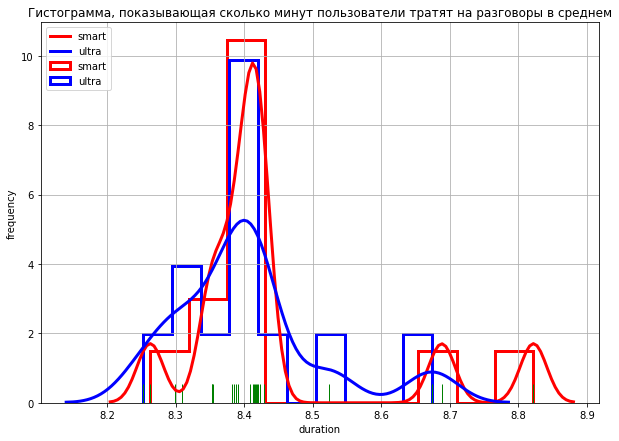

Дисперсия для smart равна: 0.021723079090634378 Cтандартное отклонение для smart равно: 0.14738751334707556
Дисперсия для ultra равна: 0.011184758173236713 Cтандартное отклонение для ultra равно: 0.10575801706365676


In [50]:
# Напишем функцию, которая будет разбивать датафрейм на две таблицы (одна - тариф ультра, вторая - смарт)
# Строить совмещенную гистограмму и рассчитывать для каждого распределения дисперсию и среднее отклонение
def hist(df, column_for_hist, tittle, bins):
    table_1 = df[df['tariff'] == 'smart']
    table_2 = df[df['tariff'] == 'ultra']
    plt.rcParams["figure.figsize"] = (10,7)
    ax = sns.distplot(table_1[column_for_hist], rug=True, bins = bins, rug_kws={"color": "g"},
                kde_kws={"color": "r", "lw": 3, "label": "smart"},
                hist_kws={"histtype": "step", "linewidth": 3,
                            "alpha": 1, "color": "r", "label": "smart"})
    ax = sns.distplot(table_2[column_for_hist], rug=True, bins = bins, rug_kws={"color": "g"},
                kde_kws={"color": "b", "lw": 3, "label": "ultra"},
                hist_kws={"histtype": "step", "linewidth": 3,
                            "alpha": 1, "color": "b", "label": "ultra"})
    plt.title(tittle, fontsize=12)
    plt.ylabel('frequency')
    plt.grid()
    plt.show()
    print('Дисперсия для smart равна:', np.var(table_1[column_for_hist]),'Cтандартное отклонение для smart равно:', np.std(table_1[column_for_hist]))
    print('Дисперсия для ultra равна:', np.var(table_2[column_for_hist]),'Cтандартное отклонение для ultra равно:', np.std(table_2[column_for_hist]))
hist(table_calls_duration_users, 'duration', 'Гистограмма, показывающая сколько минут пользователи тратят на разговоры в среднем', 10)
# Гистограмма для тарифа смарт имеет нормальное распределение, скошенное влево
# Гистограмма для тарифа ультра имеет похожий вид, как и для тарифа smart, однако есть отличие - значения больше сдвинуты влево.
# Возможно, что те, кто используют тариф ultra меньше общаются обычными телефонными звонками.

In [51]:
# Сколько сообщений требуется пользователям каждого тарифа в месяц? Расчет среднего значения сообщений по месяцам и тарифам
# Для этого объединим df_messages и df_users
table_messages_count_users = df_messages.merge(df_users, on = 'user_id')
# Выделим нужные столбцы
table_messages_count_users = table_messages_count_users[{'month_message_date', 'user_id','tariff', 'id'}]
# Сгруппируем по столбцам, обозначающим месяцы и тарифы, найдем среднее значение минут разговора
table_messages_count_users = table_messages_count_users.groupby(['month_message_date','tariff', 'user_id'], as_index = False)['id'].count()
table_messages_count_users = table_messages_count_users.groupby(['month_message_date', 'tariff'], as_index = False)['id'].mean()
#table_messages_count_users

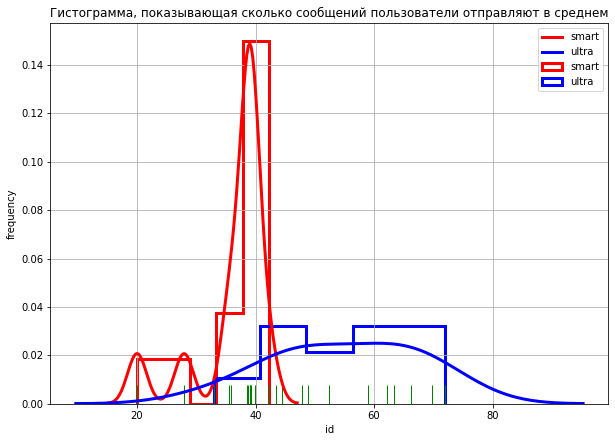

Дисперсия для smart равна: 35.57279461779263 Cтандартное отклонение для smart равно: 5.964293304138608
Дисперсия для ultra равна: 132.93920463723967 Cтандартное отклонение для ultra равно: 11.529926480131591


In [52]:
# Применим функцию к table_messages_count_users
hist(table_messages_count_users, 'id', 'Гистограмма, показывающая сколько сообщений пользователи отправляют в среднем', 5)
# Распределение для тарифа смарт похоже на нормальное, смещенное вправо
# Распределение похоже на нормальное. Если сравнивать с тарифом smart, то у ultra смещение максимума идет вправо.

In [53]:
# Какой объем интернет-трафика требуется пользователям каждого тарифа в месяц? Расчет среднего значения интернет-трафика по месяцам и тарифам
# Для этого объединим df_internet и df_users
table_internet_volume_users = df_internet.merge(df_users, on = 'user_id')
# Выделим нужные столбцы
table_internet_volume_users = table_internet_volume_users[{'month_session_date', 'user_id','tariff', 'mb_used'}]
#table_internet_volume_users
# Сгруппируем по столбцам, обозначающим месяцы и тарифы, найдем среднее значение интернет-трафика
table_internet_volume_users = table_internet_volume_users.groupby(['month_session_date','tariff'], as_index = False)['mb_used'].mean()
#table_internet_volume_users

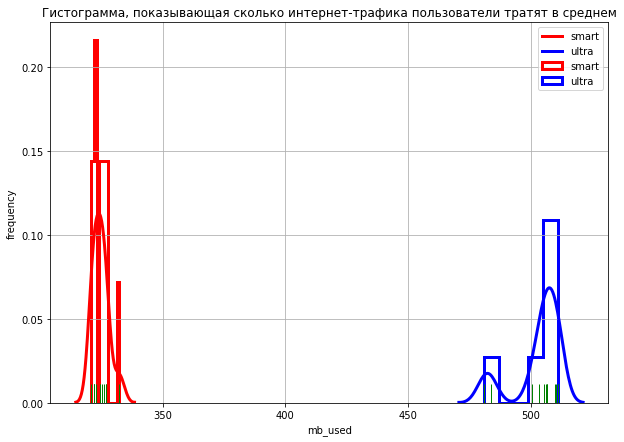

Дисперсия для smart равна: 9.361580384335936 Cтандартное отклонение для smart равно: 3.0596699796441995
Дисперсия для ultra равна: 94.32388285509558 Cтандартное отклонение для ultra равно: 9.712048334676654


In [54]:
# Применим функцию к table_messages_count_users
hist(table_internet_volume_users, 'mb_used', 'Гистограмма, показывающая сколько интернет-трафика пользователи тратят в среднем', 10)

# Распределение для смарта похоже на нормальное распределение с максимум в точке 324.5, смещенное влево 
# Распределение для ультра похоже на нормальное, сильно смещенное вправо
# Стоит отметить, что пользователи с тарифом ультра используют больше интернет-трафика, чем пользователи смарта.

<p> <font size="+1"> <b>
    Вывод
    </b> </font> </p>

На данном этапе был проведен анализ поведения клиентов оператора в зависимости от выбранного тарифа. Исходя из полученных данных можно сделать вывод, что те, кто выбирают тариф ultra более общительны по смс и интернету, чем те, кто пользуются тарифом smart. Однако, если рассматривать звонки по обычно телефонной связи, то немного больше по такому виду связи люди с тарифом smart, чем с ultra.

<p> <font size="+1"> <b>
    Шаг 4. Проверка гипотез
    </b> </font> </p>

<li> средняя выручка пользователей тарифов «Ультра» и «Смарт» различается; </li>
<li> средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов; </li>
Пороговое значение alpha задайте самостоятельно.
Поясните:
<li> как вы формулировали нулевую и альтернативную гипотезы;</li>
<li> какой критерий использовали для проверки гипотез и почему. </li>

In [55]:
# Рассмотрим первую гипотезу "средняя выручка пользователей тарифов «Ультра» и «Смарт» различается".
# Так как выясняем, есть ли разница между совокупностями, то нулевая гипотеза будет такой:
# "средняя выручка пользователей тарифов «Ультра» и «Смарт» равна".
# Альтернативная гипотеза - исходная.

# Необходимые данные находятся в таблицы df_gain.
# Разделим df_gain по тарифам:
df_gain_ultra = df_gain[df_gain['tariff'] == 'ultra']
df_gain_ultra = df_gain_ultra.groupby('user_id')['all_gain'].mean()

df_gain_smart = df_gain[df_gain['tariff'] == 'smart']
df_gain_smart = df_gain_smart.groupby('user_id')['all_gain'].mean()

# Поменяем тип данных на целочисленный
df_gain_smart = df_gain_smart.astype('int')
df_gain_ultra = df_gain_ultra.astype('int')
# Создадим функцию, которая будет отвергать или не отвергать нулевую гипотезу 
def hypothesis(df_1, df_2, a):
    # Зададим альфа
    alpha = a
    # Проверим гипотезу о равентсве средних двух независимых совокупностей
    results = st.ttest_ind(
        df_1, 
        df_2)
    print('p-уровень значимости:', alpha)
    print('p-значение:', results.pvalue)

    if (results.pvalue < alpha):
        print("Отвергаем нулевую гипотезу")
    else:
        print("Не получилось отвергнуть нулевую гипотезу")

hypothesis(df_gain_smart, df_gain_ultra, 0.01)    
# Гипотезу о различие выручки оператора от пользователей двух разных тарифов можно подтвердить, 
# так как нулевая гипотеза была отвергнута. 
# Это и логично, так как ценовая категория этих тарифов различается почти в 4 раза. 
# Маловероятно, что те, кто платят базовую стоимость 550 рублей, будут переплачивать за месяц базовую стоимость тарифа "Ультра"
# в размере 1950 рублей. Иначе бы - каждому такому клиенту позвонили бы из call-центра и постарались убедить перейти на более
# выгодный тариф (вероятно, что человек бы согласился).

p-уровень значимости: 0.01
p-значение: 1.3909529172715533e-40
Отвергаем нулевую гипотезу


In [56]:
# Рассмотрим первую гипотезу "средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов".
# Так как выясняем, есть ли разница между совокупностями, то нулевая гипотеза будет такой:
# "средняя выручка пользователей из Москвы равна выручке пользователей из других регионов".
# Альтернативная гипотеза - исходная.

# Необходимые данные находятся в таблицы df_gain.
# Добавим в таблицу города по user_id
df_gain_for_hypothesis = df_gain.merge(df_users, on = 'user_id')
df_gain_for_hypothesis = df_gain_for_hypothesis[{'tariff_x', 'all_gain', 'city', 'user_id'}]
# Разделим df_gain по тарифам:
df_gain_Moscow = df_gain_for_hypothesis[df_gain_for_hypothesis['city'] == 'Москва']
df_gain_Moscow = df_gain_Moscow.groupby('user_id')['all_gain'].mean()
df_gain_another_city = df_gain_for_hypothesis[df_gain_for_hypothesis['city'] != 'Москва']
df_gain_another_city = df_gain_another_city.groupby('user_id')['all_gain'].mean()

# Проверим нулевую гипотезу
hypothesis(df_gain_Moscow, df_gain_another_city, 0.01)
    
# Нулевую гипотезу не получилось отвергнуть, поэтому возможен такой вариант развития событий,
# когда средняя выручка по Москва равна средней выручке по остальным регионам
# Это звучит вполне логично, так как цены на тарифы одни и те же, 
# общение и в регионах, и в столице близки друг к другу по количеству, поэтому нельзя утверждать,
# что гипотеза "средняя выручка пользователей из Москвы отличается от  выручки пользователей из других регионов" имеет право на существование

p-уровень значимости: 0.01
p-значение: 0.7327984617851228
Не получилось отвергнуть нулевую гипотезу


<p> <font size="+1"> <b>
    Вывод
    </b> </font> </p>

На данном этапе были рассмотрены гипотезы. По результатам статистического анализа можно сделать вывод, что средняя выручка от пользователей тарифа "ультра" не равна средней выручке от пользователей тарифа "смарт", а про гипотезу о разнице средней выручки от пользователей из Москвы и пользователей из регионов нельзя сказать, что она имеет право на существование.

<p> <font size="+1"> <b>
    Шаг 5. Напишите общий вывод
    </b> </font> </p>

В данном проекте был выполнен предварительный анализ тарифов на небольшой выборке клиентов.
В ходе работы были выполнено следующее: <ul>
    <li> подготовка данных: приведение данных в нужные типы и исправление ошибок </li>
    <li> подсчет для каждого пользователя количество звонков, сообщений и интернет трафика по месяцам, помесячную выручку </li>
    <li> по подсчитанным данным был проведен анализ: те, кто выбирают тариф ultra более общительны по смс и интернету, чем те, кто пользуются тарифом smart. Однако, если рассматривать звонки по обычно телефонной связи, то немного больше по такому виду связи люди с тарифом smart, чем с ultra </li>
    <li> были проверены гипотезы: гипотеза о разности выручки по тарифам подтвердилась, а о разности выручки от местоположения - нет </li>
     </ul>
Таким образом, несмотря на более высокую цену "ultra" тарифа, суммарный бюджет больше приносит тариф "smart", поэтому для компании лучшим тарифом является "smart". Однако "ultra" приносит тоже немаленький процент в бюджет компании.